Consider the Chebyshev polynomial:

\begin{equation}
T_n(x) = 512x^{10} - 1280x^8 + 1120x^6 - 400x^4 + 50x^2 - 1
\end{equation}

Evaluate its roots with the Newton method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import approx
import pandas as pd
from collections import OrderedDict 

C:\Users\Utilizador\Documents\Python Scripts\Mini projects\approx.py:32: RuntimeWarning: invalid value encountered in double_scalars
  derivative[i+1] = (f(xr[i+1]) - f(xr[i])) / (xr[i+1] - xr[i])


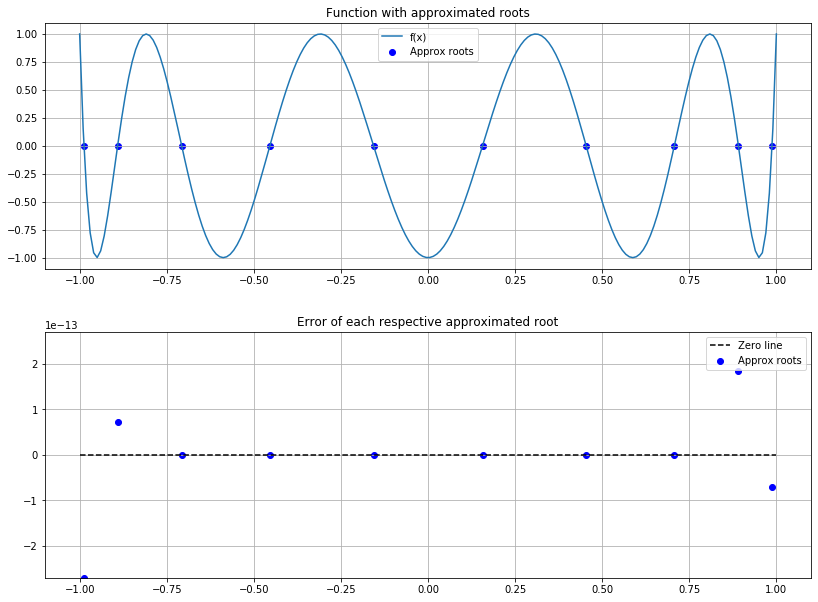

In [2]:
f = lambda x: 512*x**10 - 1280*x**8 + 1120*x**6 - 400*x**4 + 50*x**2 - 1
g = lambda x: np.sqrt(512*x**10 - 1280*x**8 + 1120*x**6 - 400*x**4 - 1) * 1/50

x = np.linspace(-1, 1, 200)


'''Estimating roots'''

estimated_roots = np.array([])

for i in range(len(x)-1):
    if f(x[i])*f(x[i+1]) < 0:
        estimated_roots = np.append(estimated_roots, (x[i] + x[i+1])/2)
        
approximated_roots = np.zeros( len(estimated_roots) )
approximated_error = np.ones( len(estimated_roots) )

'''Quick Bolzano estimation refinement'''

iterations = 10
stop_condition = 0.001

i = 0
for estimated_root in estimated_roots:
    first_point = estimated_root - 0.05
    second_point = estimated_root + 0.05
    points, error = approx.bolzano(f, estimated_root, first_point, second_point, iterations, stop_condition)[0:2]
    approximated_roots[i] = points[-1]
    approximated_error[i] = error[-1]
    i += 1
    
'''Powerful Newton method estimation (faster than Bolzano)'''

iterations = 10
stop_condition = 1e-16

i = 0
for estimated_root in estimated_roots:
    first_point = approximated_roots[i] - approximated_error[i]
    second_point = approximated_roots[i] + approximated_error[i]
    points, error = approx.newton(f, approximated_roots[i], first_point, second_point, iterations, stop_condition)[0:2]
    approximated_roots[i] = points[-1]
    approximated_error[i] = error[-1]
    i += 1
    
zeros = np.zeros( len(estimated_roots) )
true_y_error = np.zeros( len(estimated_roots) )

for i in range(len(true_y_error)):
    true_y_error[i] = abs(f(approximated_roots[i]) - zeros[i])
    

w, h = plt.figaspect(1) * 1.5
plt.figure(figsize=(2*w, 1.5*h))
plt.subplot(2, 1, 1)
plt.title('Function with approximated roots')
plt.plot(x, f(x), label='f(x)')
plt.scatter(approximated_roots, f(approximated_roots), label='Approx roots', color='b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Error of each respective approximated root')
plt.scatter(approximated_roots, f(approximated_roots), label='Approx roots', color='b')
plt.plot(x, np.zeros(len(x)), 'k--', label='Zero line')
plt.grid(True)
plt.legend(loc='best')
plt.ylim(-max(true_y_error), max(true_y_error))

plt.tight_layout(pad=3.0)
plt.show()

In [3]:
d = OrderedDict({
    'True roots' : np.full(len(approximated_roots), 'N/A'),
    'f(True roots)' : np.zeros(len(approximated_roots)),
    'Approximated roots': approximated_roots,
    'f(Approximated roots)': f(approximated_roots),
    'Approximated x error' : np.full(len(approximated_roots), 'N/A'),
    'Approximated y error' : approximated_error,
    'True x error' : np.full(len(approximated_roots), 'N/A'),
    'True y error' : true_y_error
                })

df = pd.DataFrame(data=d)

df

,True roots,f(True roots),Approximated roots,f(Approximated roots),Approximated x error,Approximated y error,True x error,True y error
0,N/A,0.0,-0.987688,-2.700062e-13,N/A,0.000068,N/A,2.700062e-13
1,N/A,0.0,-0.891007,7.105427e-14,N/A,0.000048,N/A,7.105427e-14
2,N/A,0.0,-0.707107,0.000000e+00,N/A,0.000024,N/A,0.000000e+00
3,N/A,0.0,-0.453990,0.000000e+00,N/A,0.000069,N/A,0.000000e+00
4,N/A,0.0,-0.156434,0.000000e+00,N/A,0.000025,N/A,0.000000e+00
5,N/A,0.0,0.156434,0.000000e+00,N/A,0.000025,N/A,0.000000e+00
6,N/A,0.0,0.453990,0.000000e+00,N/A,0.000069,N/A,0.000000e+00
7,N/A,0.0,0.707107,0.000000e+00,N/A,0.000024,N/A,0.000000e+00
8,N/A,0.0,0.891007,1.847411e-13,N/A,0.000048,N/A,1.847411e-13
9,N/A,0.0,0.987688,-7.105427e-14,N/A,0.000068,N/A,7.105427e-14
